# Construcción De Gif ScatterPlot

## Importamos Modulos A Usar


La lógica detrás de la creación del gif de el scatterplot es la creación de todos las escenas que componen al gif en formato png, de modo que simplemente tenemos que importar los módulos que nos servirían para realizar la visualización que deseemos, después de estos nos ayudaremos del modulo `imageio` para la creación de la “animación”.

In [2]:
# Modulos  para manejo de datos
import numpy as np 
import pandas as pd 

# Modulo para generar parametros de la funcion de relación
from sklearn.linear_model import LinearRegression

# Modulos para graficar 
import seaborn as sns
import matplotlib.pyplot as plt

# Modulo para la creación del gif 
import imageio


## Manejo De Los Datos

Como vamos a trabajar sobre dos tablas similares ya que provienen de la misma fuente (Banco Mundial), vamos a crear una sola función para arreglar y manejar los datos de las tablas, después de eso vamos a hacer un merge entre estas tablas y otra adicional llamada regiones, la cual nos permitirá acceder a información a los continentes específicos de cada país, esto con el fin de agregar información al grafico que vamos a construir.

Puede descargar los archivos originales desde el portal del [Banco Mundial](https://datos.bancomundial.org/) o acceder a los archivos modificados que se usaron en este proyecto directamente desde el [repositorio de GitHub](https://github.com/BautistaDavid/Twitter_Posts/tree/main/Gif_Scatterplot)


In [3]:
def compilador_datos(data:str) -> pd.DataFrame:
  ''' data: path del archivo csv a transformar'''

  # leemos el archivo con los datos
  df = pd.read_csv(data, encoding='latin1',on_bad_lines='skip',sep=';')

  # Modificamos los nombres de las columnas 
  df.columns = ['country','code'] + [str(año) for año in range(1990,2021)]

  # transformamos los valores numericos que estan en string 
  for col in [str(año) for año in range(1990,2021)]:
    df[col] = df[col].str.replace(',','.')
    df[col] = pd.to_numeric(df[col],errors='coerce')
  
  df = df.dropna()

  return df
  

In [6]:
# Creamos el dataframde regiones usando datos publicados por el usuario lukes en su github.
regiones = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
regiones = regiones[['name','alpha-3','region','sub-region']]
regiones.columns = ['country','code','region','sub_region']

# Ahora usamos la funcion que creamos para proecesar los datos de esperanza de vida y pib per cápita.
esperanza = compilador_datos('https://raw.githubusercontent.com/BautistaDavid/Twitter_Posts/main/Gif_Scatterplot/Esperanza_vida.csv')
per_capita = compilador_datos('https://raw.githubusercontent.com/BautistaDavid/Twitter_Posts/main/Gif_Scatterplot/per_capita.csv')

 Visualicemos las tablas creadas hasta el momento:


In [7]:
esperanza.head(3)

country code    1990    1991    1992    1993    1994    1995    1996  \
0       Aruba  ABW  73.468  73.509  73.544  73.573  73.598  73.622  73.646   
1  Afganistán  AFG  50.331  50.999  51.641  52.256  52.842  53.398  53.924   
2      Angola  AGO  45.306  45.271  45.230  45.201  45.201  45.246  45.350   

     1997  ...    2011    2012    2013    2014    2015    2016    2017  \
0  73.671  ...  75.158  75.299  75.441  75.583  75.725  75.868  76.010   
1  54.424  ...  61.553  62.054  62.525  62.966  63.377  63.763  64.130   
2  45.519  ...  56.330  57.236  58.054  58.776  59.398  59.925  60.379   

     2018    2019    2020  
0  76.152  76.293  76.434  
1  64.486  64.833  65.173  
2  60.782  61.147  61.487  

[3 rows x 33 columns]

In [8]:
per_capita.head(3)

country code          1990          1991          1992          1993  \
0    Aruba  ABW  21942.267490  23554.172810  24156.033900  24978.226170   
2   Angola  AGO   3263.334350   3295.730956   3071.610764   2313.921780   
3  Albania  ALB   2549.708941   1909.290810   1823.476534   2057.661495   

           1994          1995          1996          1997  ...          2011  \
0  26089.472260  26084.334980  25944.406820  27511.335930  ...  35513.081190   
2   2318.952828   2636.525014   2952.011249   3119.365502  ...   6710.750725   
3   2290.109912   2666.042365   2980.374617   2717.644348  ...  10207.767570   

           2012          2013          2014          2015          2016  \
0  34632.951650  36830.156610  36782.227120  37314.564390  37587.065940   
2   7412.967137   7682.475646   8179.297828   7337.569901   7103.226249   
3  10526.259180  10570.963730  11259.267510  11658.905520  12078.843140   

           2017          2018          2019          2020  
0  38893.960560  40143.000270  39834.223900  31182.833880  
2   7310.896551   7148.933253   6995.299736   6478.332182  
3  12770.964290  13498.138170  13999.423970  13632.186540  

[3 rows x 33 columns]

In [9]:
regiones.head(3)

country code  region       sub_region
0    Afghanistan  AFG    Asia    Southern Asia
1  Åland Islands  ALA  Europe  Northern Europe
2        Albania  ALB  Europe  Southern Europe

Ahora modificaremos las tablas `esperanza` y `per_capita` para que cada año en cada país corresponda una sola observación y queden configurados como datos de tipo panel, esto lo haremos usando la función `pd.melt()`. 


Después de eso crearemos algunas columnas adicionales para poder establecer los parámetros de la función de relación entre las variables de esperanza de vida y PIB per cápita. Adicionalmente realizaremos los merge de las tablas y visualizaremos el resultado.


In [10]:
df1 = pd.melt(esperanza,id_vars=['country','code'],value_vars=[str(i) for i in range(1990,2021)],var_name='year',value_name='esperanza')

df2 = pd.melt(per_capita,id_vars=['country','code'],value_vars=[str(i) for i in range(1990,2021)],var_name='year',value_name='per_capita')

df = pd.merge(df1,df2,on=['country','code','year'],how='outer')
df_ = df.dropna()
df_ = df_.merge(regiones,on=['code'],how='outer').dropna().drop(columns=['country_y'])
df_.columns = ['country','code','year','esperanza','per_capita','Region','sub_region']
df_['per_capita'] = df_['per_capita']/1000
df_['log_per_capita'] = np.log10(df_['per_capita'])
df_['Region'] = df_['Region'].replace({'Americas':'America'})

df_.head()

country code  year  esperanza  per_capita   Region  \
0   Aruba  ABW  1990     73.468   21.942267  America   
1   Aruba  ABW  1991     73.509   23.554173  America   
2   Aruba  ABW  1992     73.544   24.156034  America   
3   Aruba  ABW  1993     73.573   24.978226  America   
4   Aruba  ABW  1994     73.598   26.089472  America   

                        sub_region  log_per_capita  
0  Latin America and the Caribbean        1.341282  
1  Latin America and the Caribbean        1.372068  
2  Latin America and the Caribbean        1.383026  
3  Latin America and the Caribbean        1.397562  
4  Latin America and the Caribbean        1.416465

## Creación De La Grafica Base.


Para la creación de la grafica base lo ideal sería crearla usando funciones que reciban un año en específico, esto con el fin de simplemente realizar un bucle con todos los años que van a conformar el gif, recordemos que el objetivo es crear tantos archivos png queramos para que sean cada escena del gif. Primero crearemos una función que calculara los coeficientes de una línea de regresión entre las variables esperanza de vida y PIB per cápita, después una que le da forma y estilo a al grafica. 


In [14]:
def regresion(df):
  y = df['esperanza'].to_numpy().reshape(-1,1)
  X = df['log_per_capita'].to_numpy().reshape(-1,1)
  reg = LinearRegression().fit(X,y)
  return {'parametro':reg.coef_,'intercepto':reg.intercept_}

In [17]:
def grafica_(año):

  # filtramos las observasciones para todos los paises en un solo año 
  df = df_[df_['year']==año]
  
  # Cargamso los datos de la linea de regresion 
  parametro = regresion(df)['parametro'][0][0]
  intercepto = regresion(df)['intercepto'][0]

  # Empezamos a contruir la grafica 

  X = np.linspace(0.1,58,100) # cremos una arreglo con numpy para graficar la funcion de regresion
  sns.set_theme()     # fijamos un tema de estilo de seaborn
  
  plt.figure(figsize=(11,7))  # Le damos dimensiones a la figura 
  plt.title(f'Relación Esperanza de Vida y PIB Per Cápita\n ',fontsize=25,loc='left') # configuramos el titulo
  
  plt.plot(X,intercepto + parametro * np.log10(X),c='black',linestyle='--') # Graficamos la linea de regresion  
  sns.scatterplot(data=df,x='per_capita',y='esperanza',hue='Region',s=50) # Graficamos el scatterplot
  
  plt.xlabel('\nPIB PER CÁPITA (Miles de USD)\n \n ',fontsize=16)  # configuramos lable del eje x 
  plt.ylabel('Esperanza de Vida (Años)\n ',fontsize=16)   # configuramos lable del eje y
 
  plt.xticks(size=15)  # configuramos tamaño de las unidades del eje x 
  plt.yticks(size=15)  # configuramos tamaño de las unidades del eje y 
  
  plt.ylim(30,90)     # Configuramos limites de visualizacion del eje x 
  plt.xlim(0,58)      # Configuramos limites de visualizacion del eje x

  plt.legend(loc='lower right',borderpad=1,fontsize=14) # configuramos el cuadro de las leyendas del grafico
  
  # Creamos un suptiulo y textos para agregar informacion adicional al grafico 
  plt.suptitle('PIB Per Cápita en USD PPA, Datos: Banco Mundial *',x=0.365,y=0.92) 
  plt.text(x=30.25,y=42,s=f'{año}',fontsize=40)
  plt.text(x=45,y=15,s='Autor: David Bautista\n          @PipeBau_')

  # Guardamos la figura, notese que el nombre tambien conforma una estructura de iteracion por año
  plt.savefig(f'grafica_{año}.png',dpi=100, bbox_inches='tight')
  plt.show()




Vamos a probar como se vería cada grafica usando un bucle, así pues las imágenes ya quedarán guardadas en el directorio.


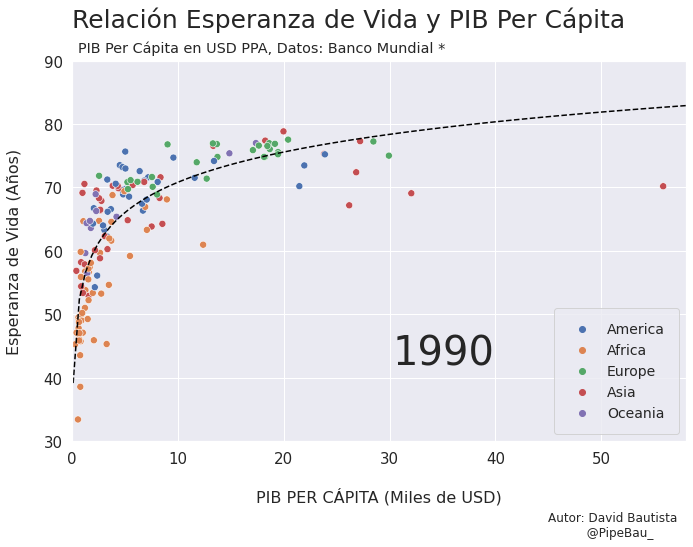

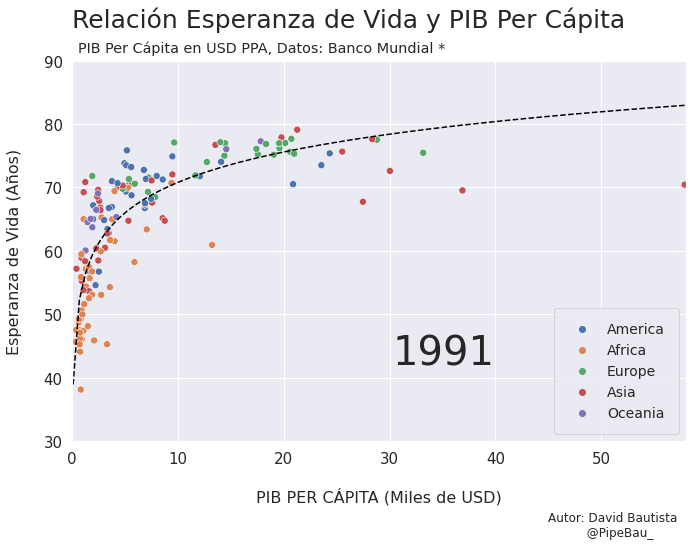

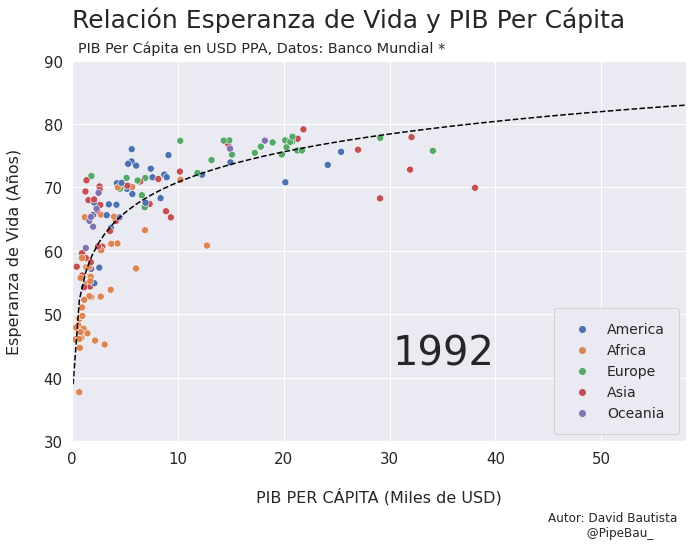

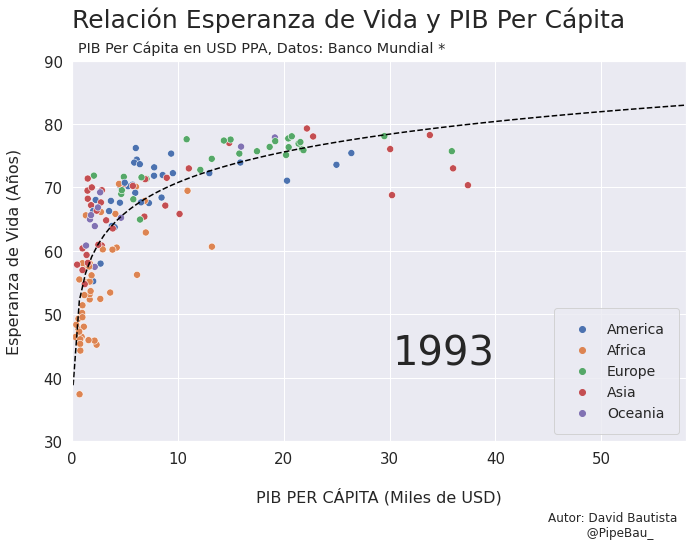

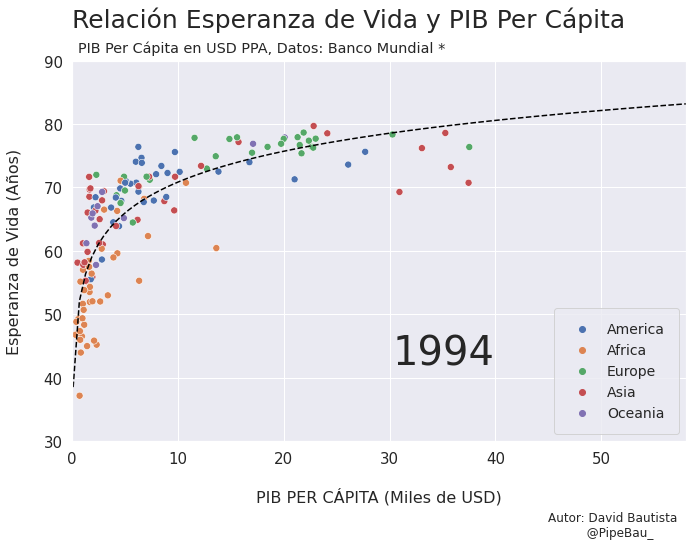

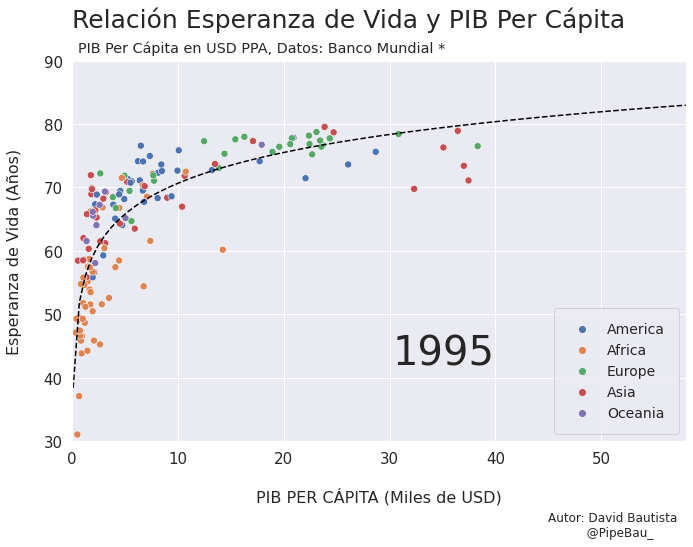

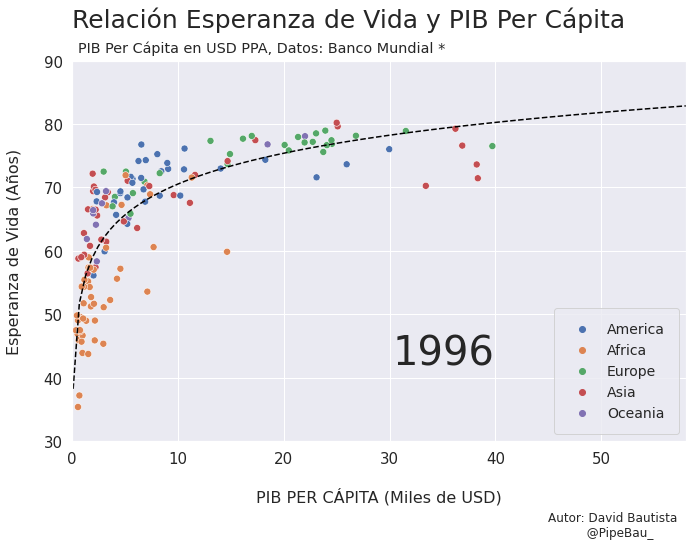

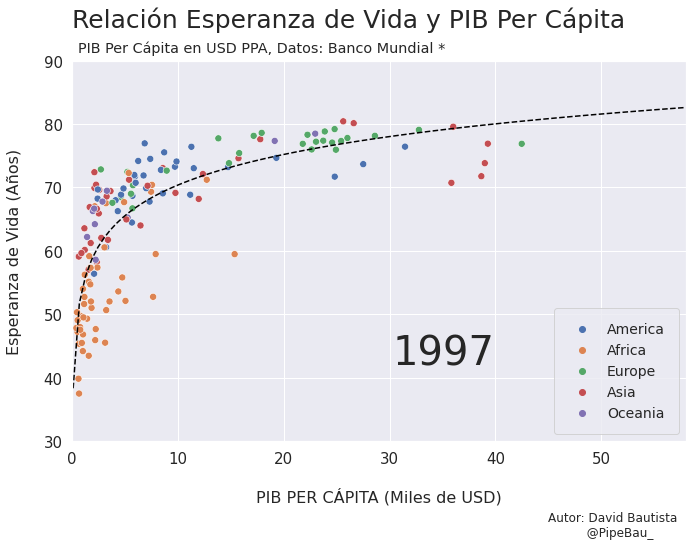

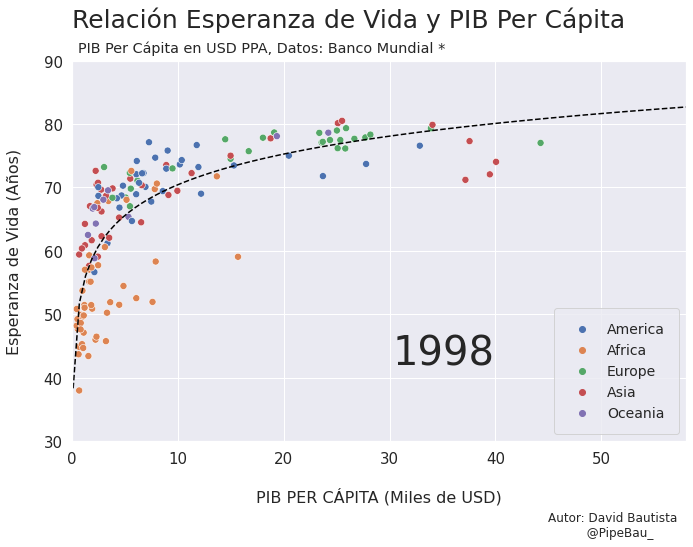

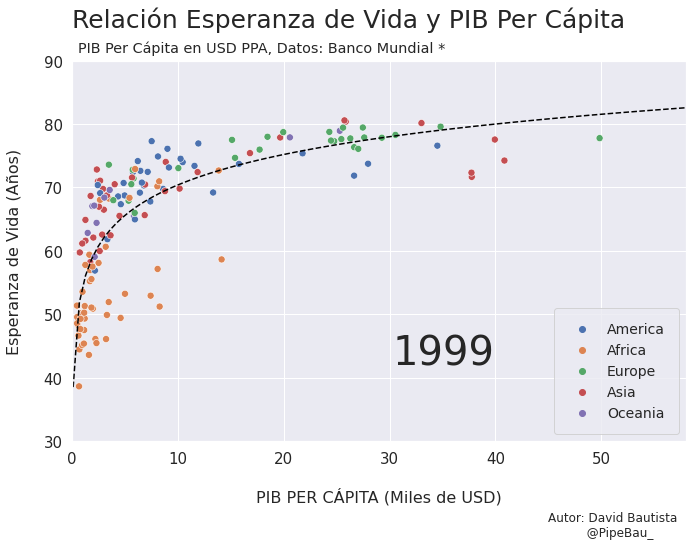

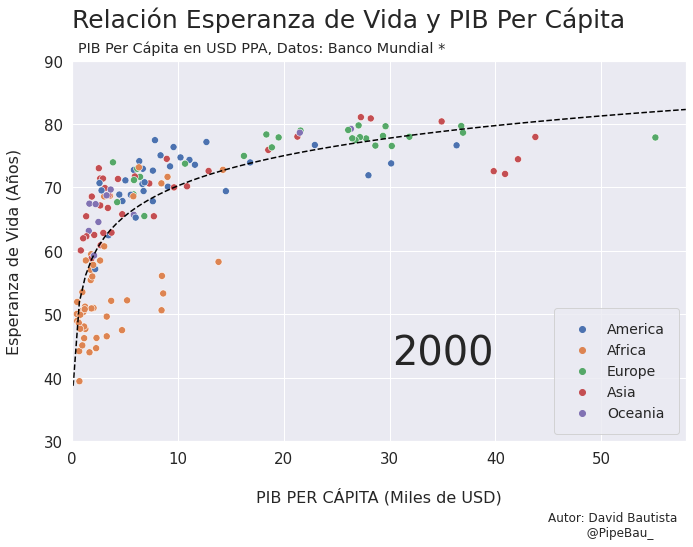

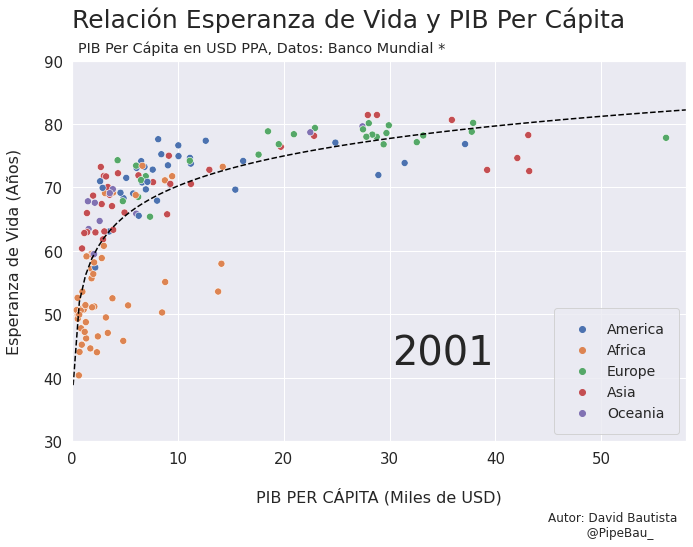

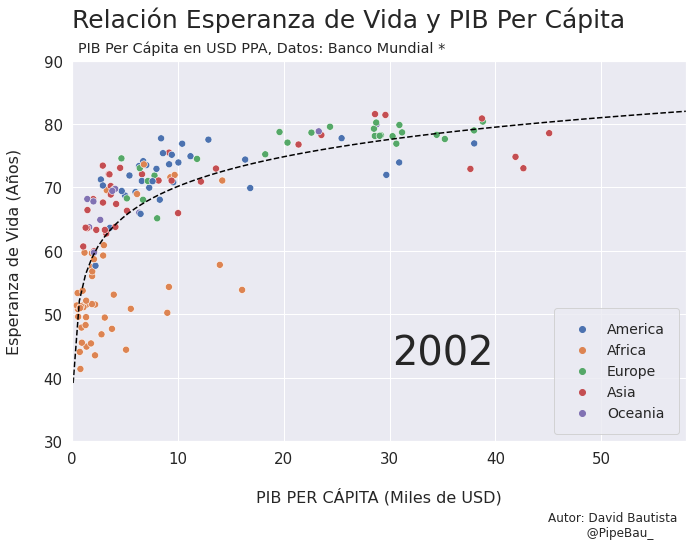

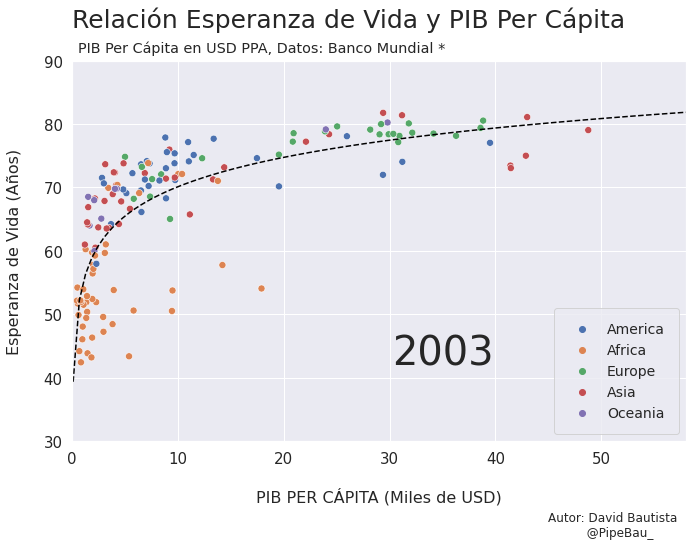

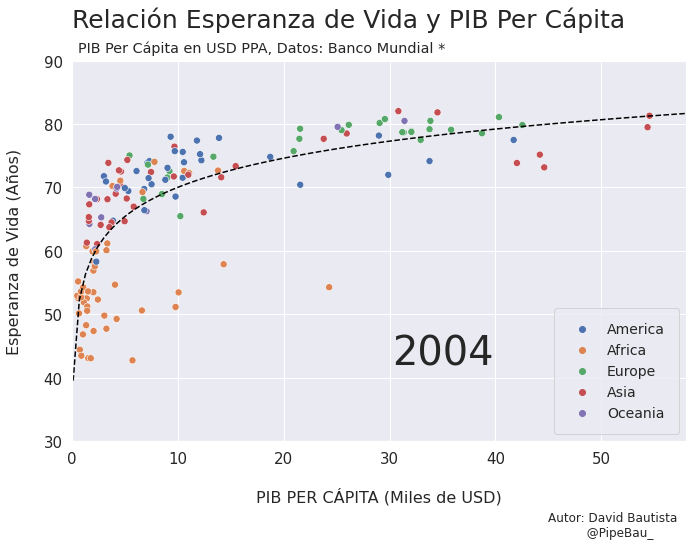

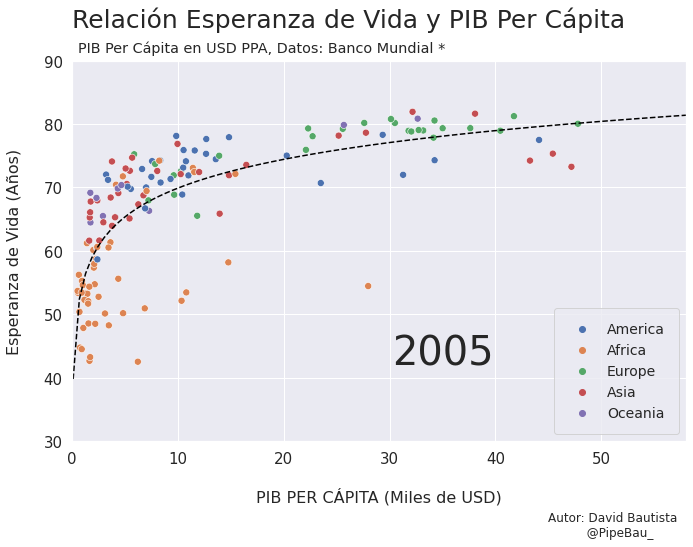

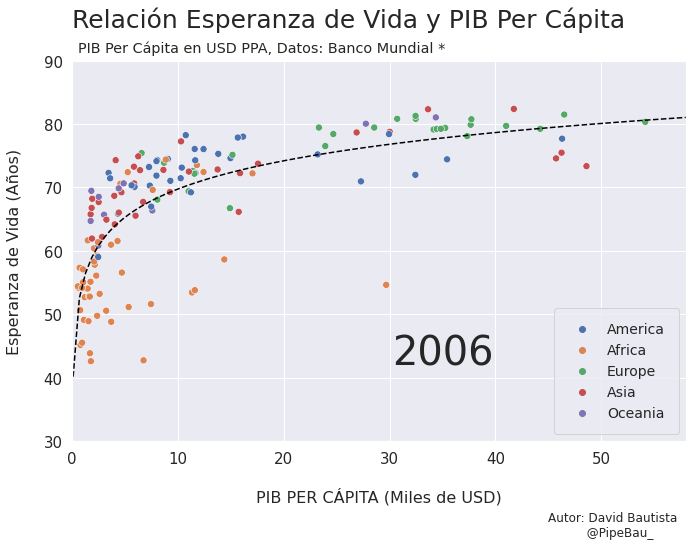

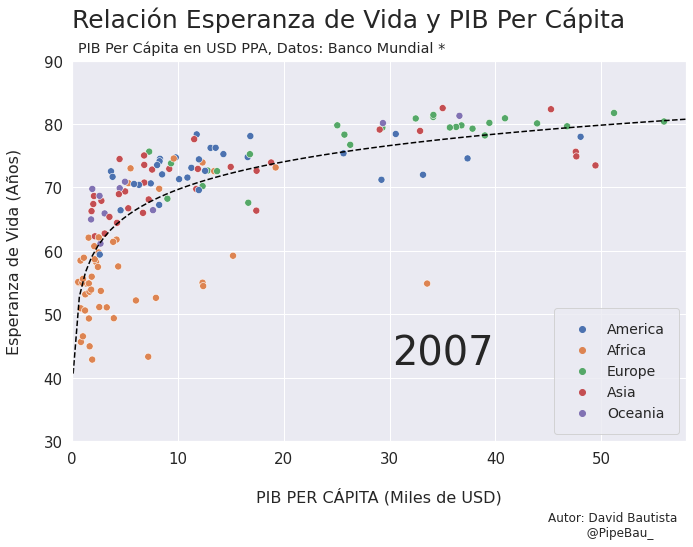

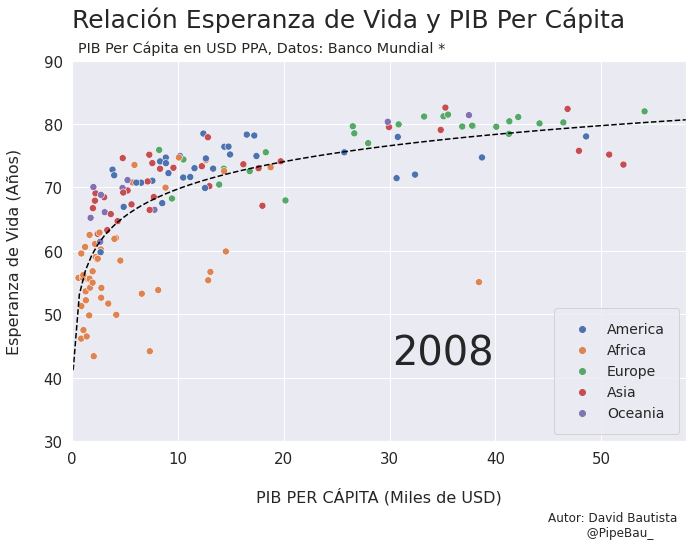

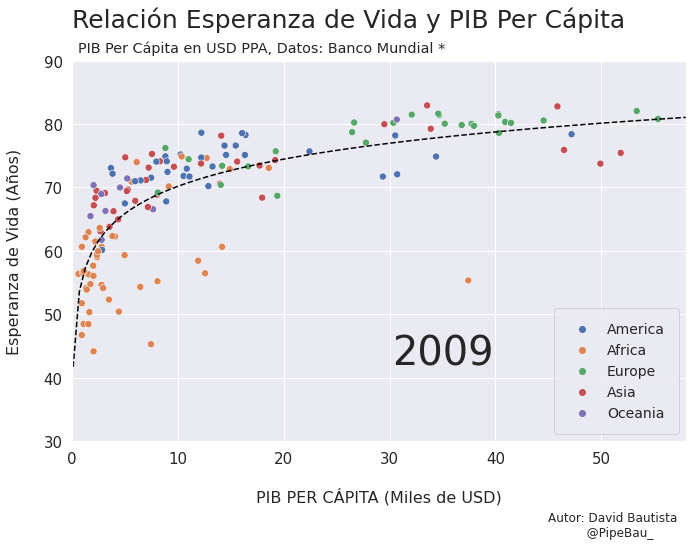

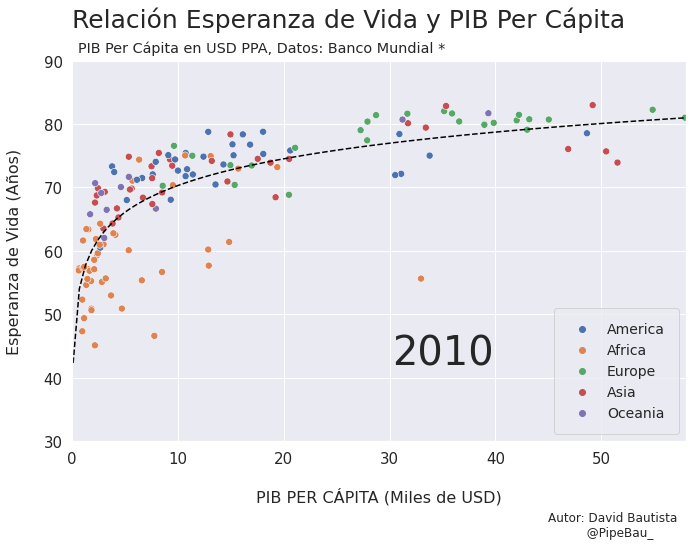

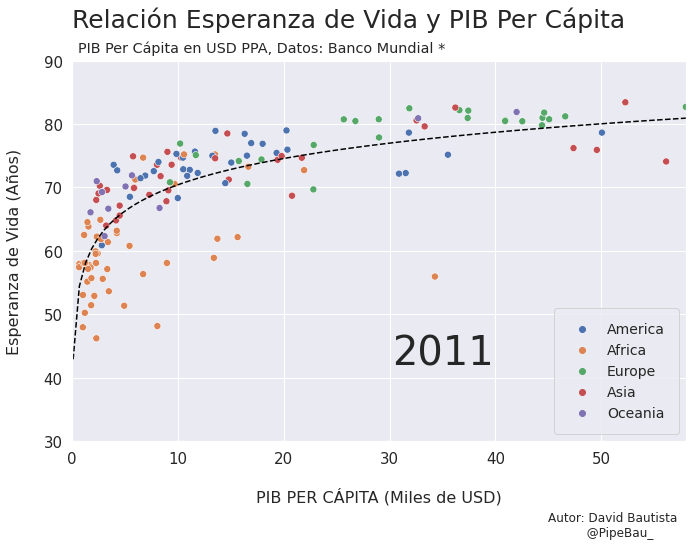

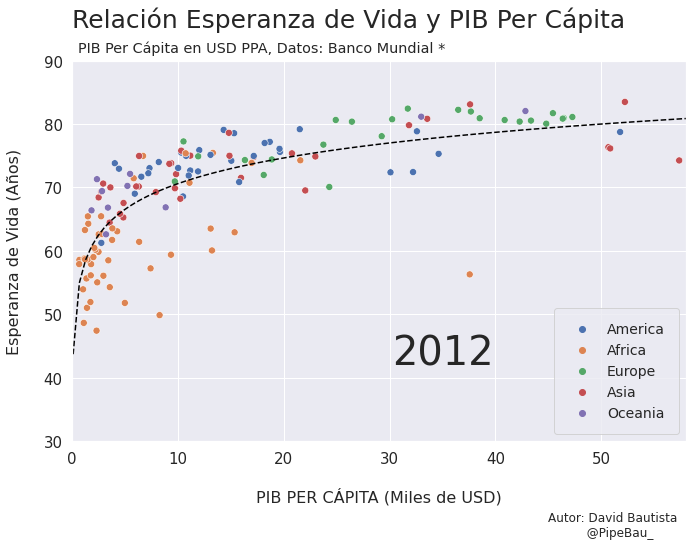

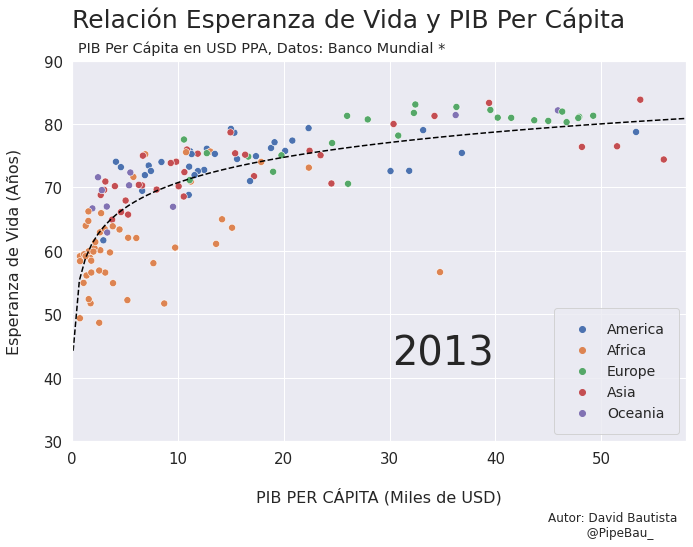

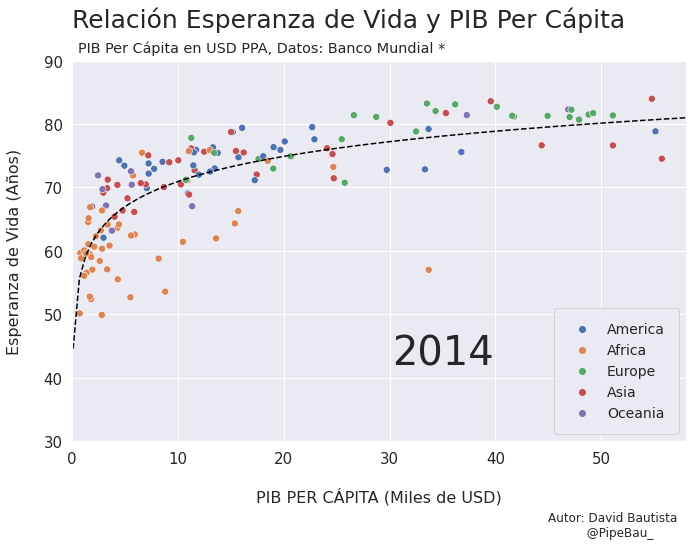

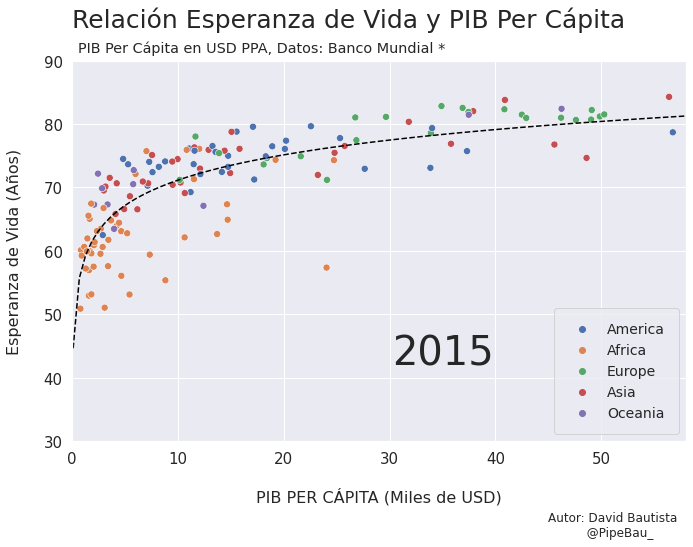

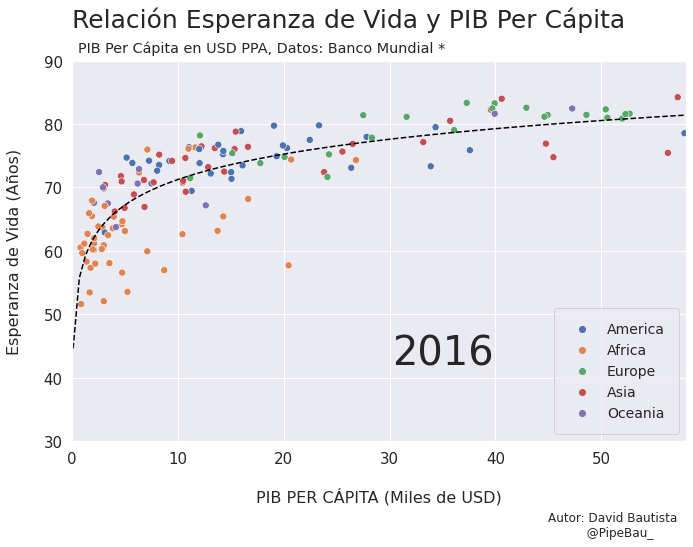

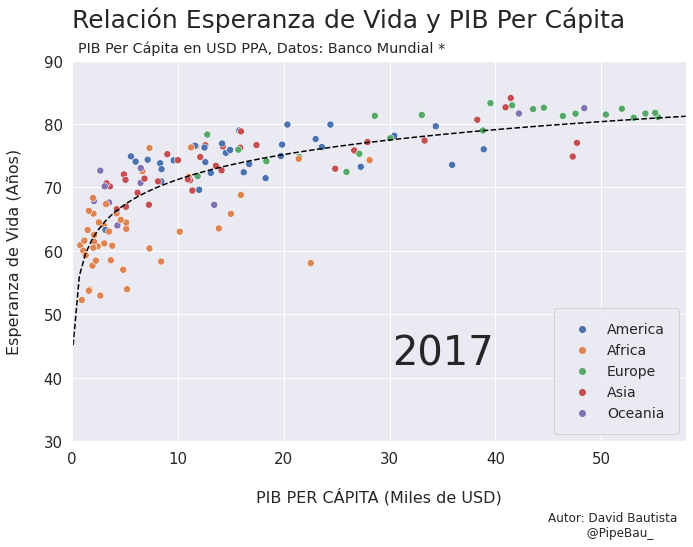

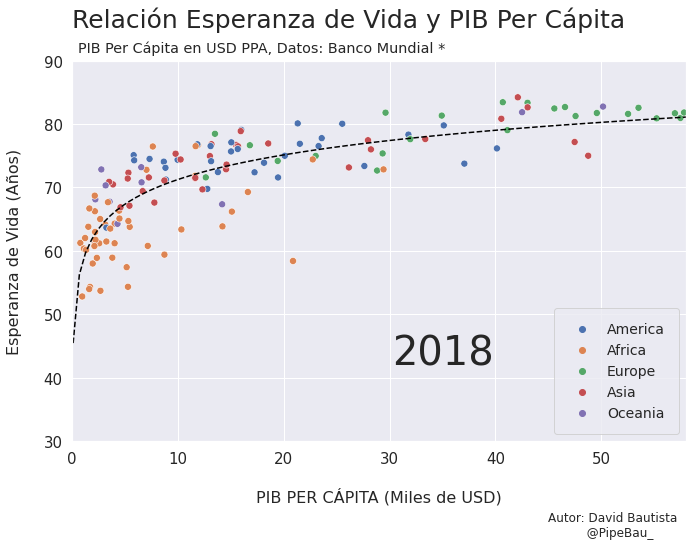

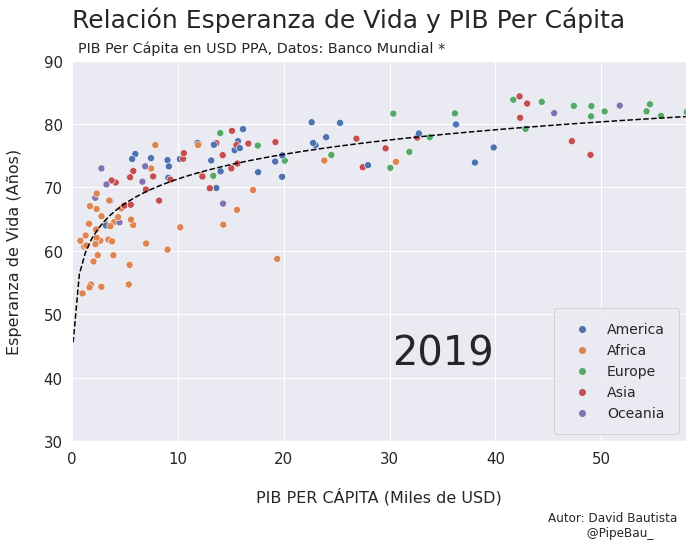

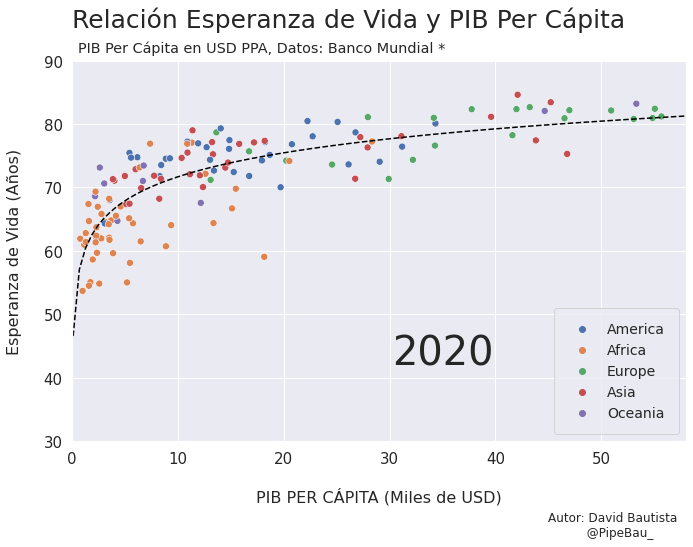

In [18]:
for año in [str(j) for j in range(1990,2021)]:
  grafica_(año)

## Contruyamos El Gif!!! 


Ahora usamos una estructura básica del módulo imageio para “escribir” el gif con todas las imágenes que ya están en sistema por medio de un bucle.  


In [19]:
import imageio
with imageio.get_writer('scatter.gif', mode='i',duration=0.5) as writer:
    for i in range(1990, 2021):
        image = imageio.imread(f'grafica_{i}.png')
        writer.append_data(image)

<!DOCTYPE html>
<html>
   <head>
      <title> </title>
   </head>
   <body>
      <h1>Resultado:</h1>
      <img src="https://raw.githubusercontent.com/BautistaDavid/Twitter_Posts/main/Gif_Scatterplot/scatter.gif">
   </body>
</html>